<a href="https://colab.research.google.com/github/daaniakhalith/AI-102-AIEngineer/blob/master/Logisticregression_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

Data Loading

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [11]:
df = pd.read_csv(url, names=names,na_values='?')


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**DataSet Features and records count**

In [13]:
df.shape

(303, 14)

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Finding Null Values in Dataset and drop records**

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.dropna(inplace=True,axis=0)

In [18]:
df['target'].value_counts()

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [19]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


In [20]:
df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [21]:
target_count=df['target'].value_counts()

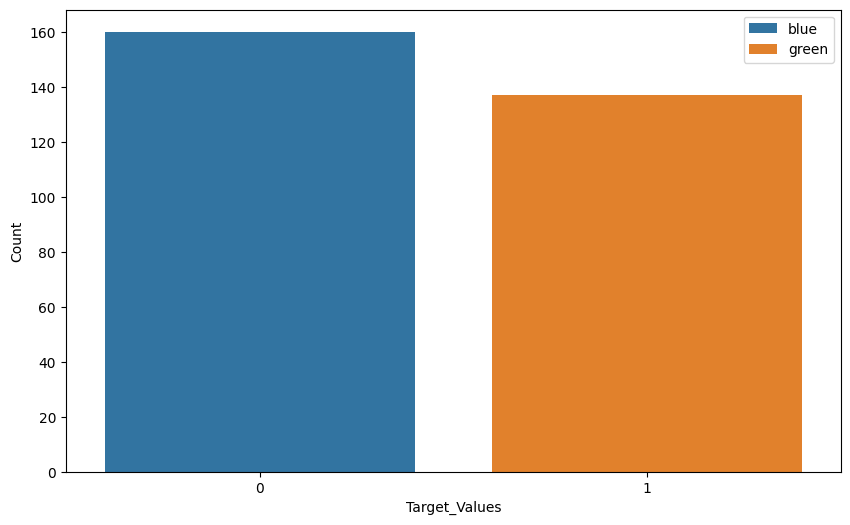

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=target_count.index,y=target_count.values,hue=['blue','green'])
plt.xlabel("Target_Values")
plt.ylabel("Count")
plt.show()


**Corelation Matrix**

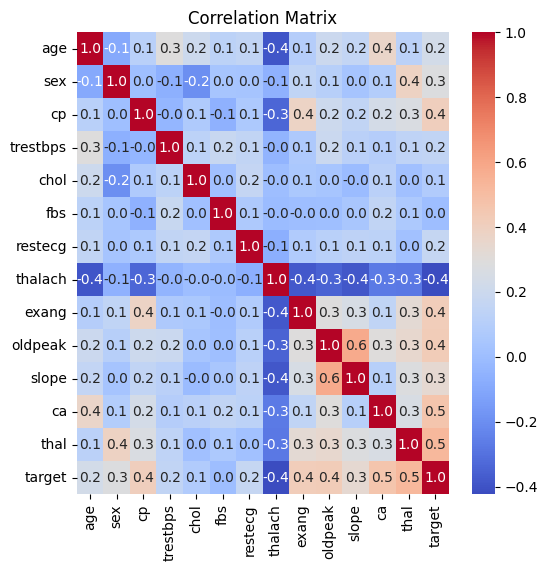

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()


Splitting Train and Test Data

In [23]:
X=df.drop('target',axis=1)
y=df['target']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

MODEL BUILDING

In [25]:
model=LogisticRegression()

Training Model

In [26]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediction the test set**

In [27]:
y_pred=model.predict(X_test)

**MODEL EVALUATION WITH CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [28]:
print(confusion_matrix(y_test,y_pred))

[[31  5]
 [ 3 21]]


TP=31
TN=21
FP=3
FN=5

recall=TP/TP+FN =31/36
precision=TP/TP+FP=31/34
accuracy=TP+TN/TP+TN+FP+FN=52/60
specificity=TN/TN+FP

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.81      0.88      0.84        24

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_probs = model.predict_proba(X_test)[:, 1]
we are getting probability of positive class

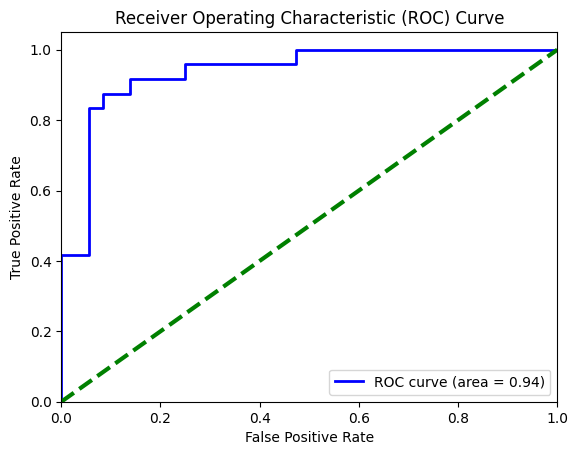

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr ,threshold = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(tpr)
print(fpr)

[0.         0.04166667 0.41666667 0.41666667 0.83333333 0.83333333
 0.875      0.875      0.91666667 0.91666667 0.95833333 0.95833333
 1.         1.        ]
[0.         0.         0.         0.05555556 0.05555556 0.08333333
 0.08333333 0.13888889 0.13888889 0.25       0.25       0.47222222
 0.47222222 1.        ]


In [ ]:
print(threshold)

[1.99185224 0.99185224 0.88157174 0.80582092 0.61293858 0.5645217
 0.56227843 0.54073782 0.47697354 0.253722   0.2420427  0.1253981
 0.12333143 0.01569216]


In [ ]:
model.predict_proba(X_test)

array([[0.94464501, 0.05535499],
       [0.7579573 , 0.2420427 ],
       [0.9807822 , 0.0192178 ],
       [0.01217773, 0.98782227],
       [0.95693327, 0.04306673],
       [0.4510695 , 0.5489305 ],
       [0.8974763 , 0.1025237 ],
       [0.45926218, 0.54073782],
       [0.24877204, 0.75122796],
       [0.86577864, 0.13422136],
       [0.52302646, 0.47697354],
       [0.91046195, 0.08953805],
       [0.98019425, 0.01980575],
       [0.76839777, 0.23160223],
       [0.70683145, 0.29316855],
       [0.98042846, 0.01957154],
       [0.746278  , 0.253722  ],
       [0.67796392, 0.32203608],
       [0.38706142, 0.61293858],
       [0.92044197, 0.07955803],
       [0.20286727, 0.79713273],
       [0.32131956, 0.67868044],
       [0.36595537, 0.63404463],
       [0.76228673, 0.23771327],
       [0.11842826, 0.88157174],
       [0.88622966, 0.11377034],
       [0.02154781, 0.97845219],
       [0.3405386 , 0.6594614 ],
       [0.80087564, 0.19912436],
       [0.92814047, 0.07185953],
       [0.

In [ ]:
model.predict_proba(X_test)[:,1]

array([0.05535499, 0.2420427 , 0.0192178 , 0.98782227, 0.04306673,
       0.5489305 , 0.1025237 , 0.54073782, 0.75122796, 0.13422136,
       0.47697354, 0.08953805, 0.01980575, 0.23160223, 0.29316855,
       0.01957154, 0.253722  , 0.32203608, 0.61293858, 0.07955803,
       0.79713273, 0.67868044, 0.63404463, 0.23771327, 0.88157174,
       0.11377034, 0.97845219, 0.6594614 , 0.19912436, 0.07185953,
       0.0605572 , 0.01569216, 0.98593414, 0.19098092, 0.13338167,
       0.18829044, 0.66065183, 0.07296807, 0.99185224, 0.75670994,
       0.066246  , 0.95328731, 0.92863379, 0.80582092, 0.04287282,
       0.56227843, 0.27833989, 0.98710773, 0.5645217 , 0.0523278 ,
       0.0333931 , 0.89444818, 0.12333143, 0.1253981 , 0.91740908,
       0.64399177, 0.06873624, 0.08261852, 0.7574227 , 0.87186681])